# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 70.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [8]:
df_data = pd.read_csv('/content/drive/MyDrive/100days/99/mission_launches.csv')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [9]:
print(f"the shape of the data frame is: {df_data.shape}")
print(f"Name of each column: { df_data.columns }")
print(f"Number of columns: { len(df_data.columns) }")
print(f"Number of row: { len(df_data) }")
print(f"NAN values:")
print(df_data.isna())
print(f"duplicate values:")
print(df_data.duplicated())

the shape of the data frame is: (4324, 9)
Name of each column: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')
Number of columns: 9
Number of row: 4324
NAN values:
      Unnamed: 0.1  Unnamed: 0  Organisation  Location   Date  Detail  \
0            False       False         False     False  False   False   
1            False       False         False     False  False   False   
2            False       False         False     False  False   False   
3            False       False         False     False  False   False   
4            False       False         False     False  False   False   
...            ...         ...           ...       ...    ...     ...   
4319         False       False         False     False  False   False   
4320         False       False         False     False  False   False   
4321         False       False         False     False  False   False 

In [10]:
type(df_data)

pandas.core.frame.DataFrame

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [11]:
df_data = df_data.drop_duplicates()

In [12]:
df_data = df_data.dropna()

## Descriptive Statistics

In [13]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [15]:
df_data_set_counts = df_data['Organisation'].value_counts()

In [16]:
# x='Organisation', y='Number of launches'
# plt.ylabel('Org')
# plt.xlabel('Count')
# plt.title('Number of Launches per company')
px.bar(df_data_set_counts)

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [17]:
df_data_set_counts = df_data['Rocket_Status'].value_counts()

In [18]:
px.bar(df_data_set_counts)

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [19]:
df_data_set_counts = df_data['Mission_Status'].value_counts()

In [20]:
px.bar(df_data_set_counts)

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [21]:
for row in df_data.index:
  price = df_data.loc[row, ['Price']]
  try:
    intprice = float(price)
  except ValueError:
    intprice = float(price.str.replace(",",""))
  df_data.loc[row, ['Price']] = intprice
df_data_set_counts = df_data['Price'].value_counts()

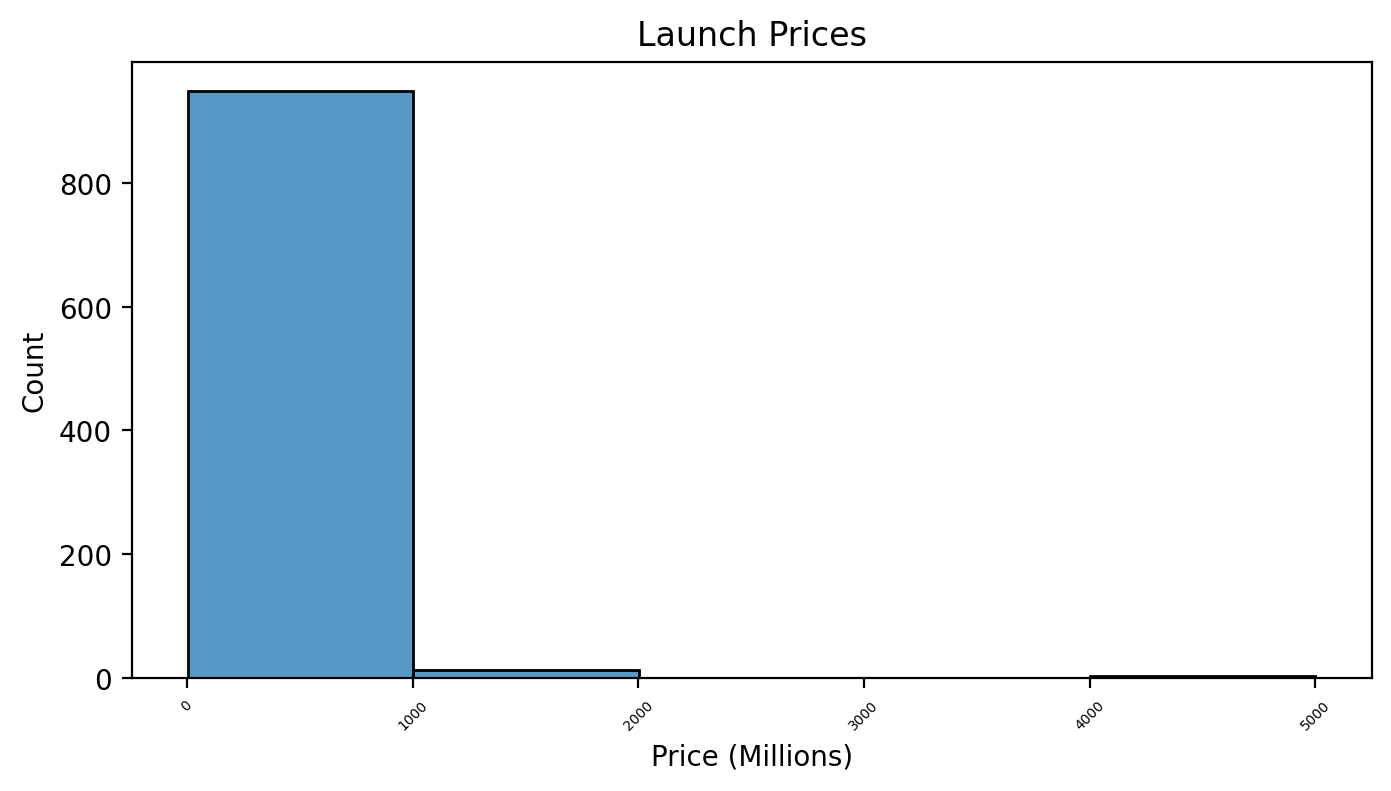

In [22]:
plt.figure(
    figsize=(
        8,
        4
    ),
    dpi=200
)
sns.histplot(
    data=df_data,
    x=df_data.Price,
    bins=5

)
plt.xlabel('Price (Millions)')
plt.xticks(rotation = 45, fontsize=5)
plt.title('Launch Prices')
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [23]:
# df_data.head()
# print(type(df_data))
overrides = {
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA'
}
for row in df_data.index:
  location = df_data['Location'][row]
  locationlist = location.split(', ')
  try:
    result = countries.get(locationlist[len(locationlist) -1 ])
  except KeyError:
    result = overrides[locationlist[len(locationlist) -1 ]]
    result = countries.get(result)
  # print(result.alpha3)
  # print(df_data.loc[row])
  df_data.loc[row, ['ISO']] = result.alpha3
  # print(df_data.loc[row])
df_countries = df_data.groupby(['ISO'],as_index=False)
#

In [24]:
launches_by_country=[]
for i in df_data.ISO.unique():
    launches_by_country.append(df_data['ISO'].value_counts()[i])
world_map = px.choropleth(
                          locations=df_data.ISO.unique(),
                          color=launches_by_country,
                          color_continuous_scale=px.colors.sequential.matter,
                          hover_name=df_data.ISO.unique()
                          )
world_map.update_layout(coloraxis_showscale=True)
world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [25]:
data_failures=df_data[df_data.Mission_Status!='Success']
fail_by_country=[]
for i in data_failures.ISO.unique():
    fail_by_country.append(data_failures['ISO'].value_counts()[i])

In [26]:
world_map = px.choropleth(
                          locations=data_failures.ISO.unique(),
                          color=fail_by_country,
                          color_continuous_scale=px.colors.sequential.matter,
                          hover_name=data_failures.ISO.unique()
                          )
world_map.update_layout(coloraxis_showscale=True)
world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [27]:
burst = px.sunburst(
    df_data,
    path=[
        'ISO',
        'Organisation',
        'Mission_Status'
    ],
)
burst.update_layout(
                    coloraxis_showscale=False
                    )
burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [28]:
print(df_data.groupby(by='Organisation')['Price'])

In [29]:
for row in df_data.index:
  price = df_data.loc[row, ['Price']]
  try:
    intprice = float(price)
  except ValueError:
    intprice = float(price.str.replace(",",""))
  df_data.loc[row, ['Price']] = intprice

In [30]:
df_data.groupby(by='Organisation')['Price'].sum()

Organisation
Arianespace       16,345.00
Boeing             1,241.00
CASC               6,340.26
EER                   20.00
ESA                   37.00
Eurockot             543.40
ExPace                28.30
ILS                1,320.00
ISRO               2,177.00
JAXA                 168.00
Kosmotras            638.00
Lockheed             280.00
MHI                3,532.50
Martin Marietta      721.40
NASA              76,280.00
Northrop           3,930.00
RVSN USSR         10,000.00
Rocket Lab            97.50
Roscosmos          1,187.50
Sandia                15.00
SpaceX             5,444.00
ULA               14,798.00
US Air Force       1,550.92
VKS RF             1,548.90
Virgin Orbit          12.00
Name: Price, dtype: object

# Analyse the Amount of Money Spent by Organisation per Launch

In [31]:
df_data.groupby(by='Organisation')['Price'].mean()

Organisation
Arianespace         170.26
Boeing              177.29
CASC                 40.13
EER                  20.00
ESA                  37.00
Eurockot             41.80
ExPace               28.30
ILS                 101.54
ISRO                 32.49
JAXA                 56.00
Kosmotras            29.00
Lockheed             35.00
MHI                  95.47
Martin Marietta      80.16
NASA                511.95
Northrop             47.35
RVSN USSR         5,000.00
Rocket Lab            7.50
Roscosmos            51.63
Sandia               15.00
SpaceX               54.99
ULA                 151.00
US Air Force         59.65
VKS RF               46.94
Virgin Orbit         12.00
Name: Price, dtype: float64

# Chart the Number of Launches per Year

In [32]:
for row in df_data.index:
  date = df_data['Date'][row]
  datelist = date.split(' ')
  df_data.loc[row, ['year']] = datelist[3]
  df_data.loc[row, ['month']] = datelist[1]
  # print(df_data.loc[row])
count_by_year = []
for i in df_data.year.unique():
  count_by_year.append(df_data['year'].value_counts()[i])
print(count_by_year)

[52, 73, 88, 66, 64, 39, 41, 33, 25, 29, 29, 31, 28, 29, 27, 15, 17, 20, 17, 10, 16, 14, 18, 18, 14, 10, 16, 12, 12, 7, 11, 6, 5, 3, 3, 10, 6, 5, 4, 2, 1, 2, 2, 1, 8, 10, 8, 3, 2, 2]


In [33]:
fig = px.area(df_data, x=df_data.year.unique(), y=count_by_year)
fig.show()


# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [34]:
count_by_month = []
for i in df_data.month.unique():
  count_by_month.append(df_data['month'].value_counts()[i])

In [35]:
fig = px.area(df_data, x=df_data.month.unique(), y=count_by_month)
fig.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [36]:
print(df_data['month'].value_counts())
data = df_data['month'].value_counts().max()
print(type(data))

Dec    92
Apr    91
Sep    88
May    86
Jun    85
Oct    83
Aug    82
Jul    77
Mar    77
Nov    77
Jan    66
Feb    60
Name: month, dtype: int64
<class 'numpy.int64'>


In [37]:
df_data['month'].value_counts().min()

60

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [38]:
mean_price = df_data.groupby(by='year')['Price'].mean()

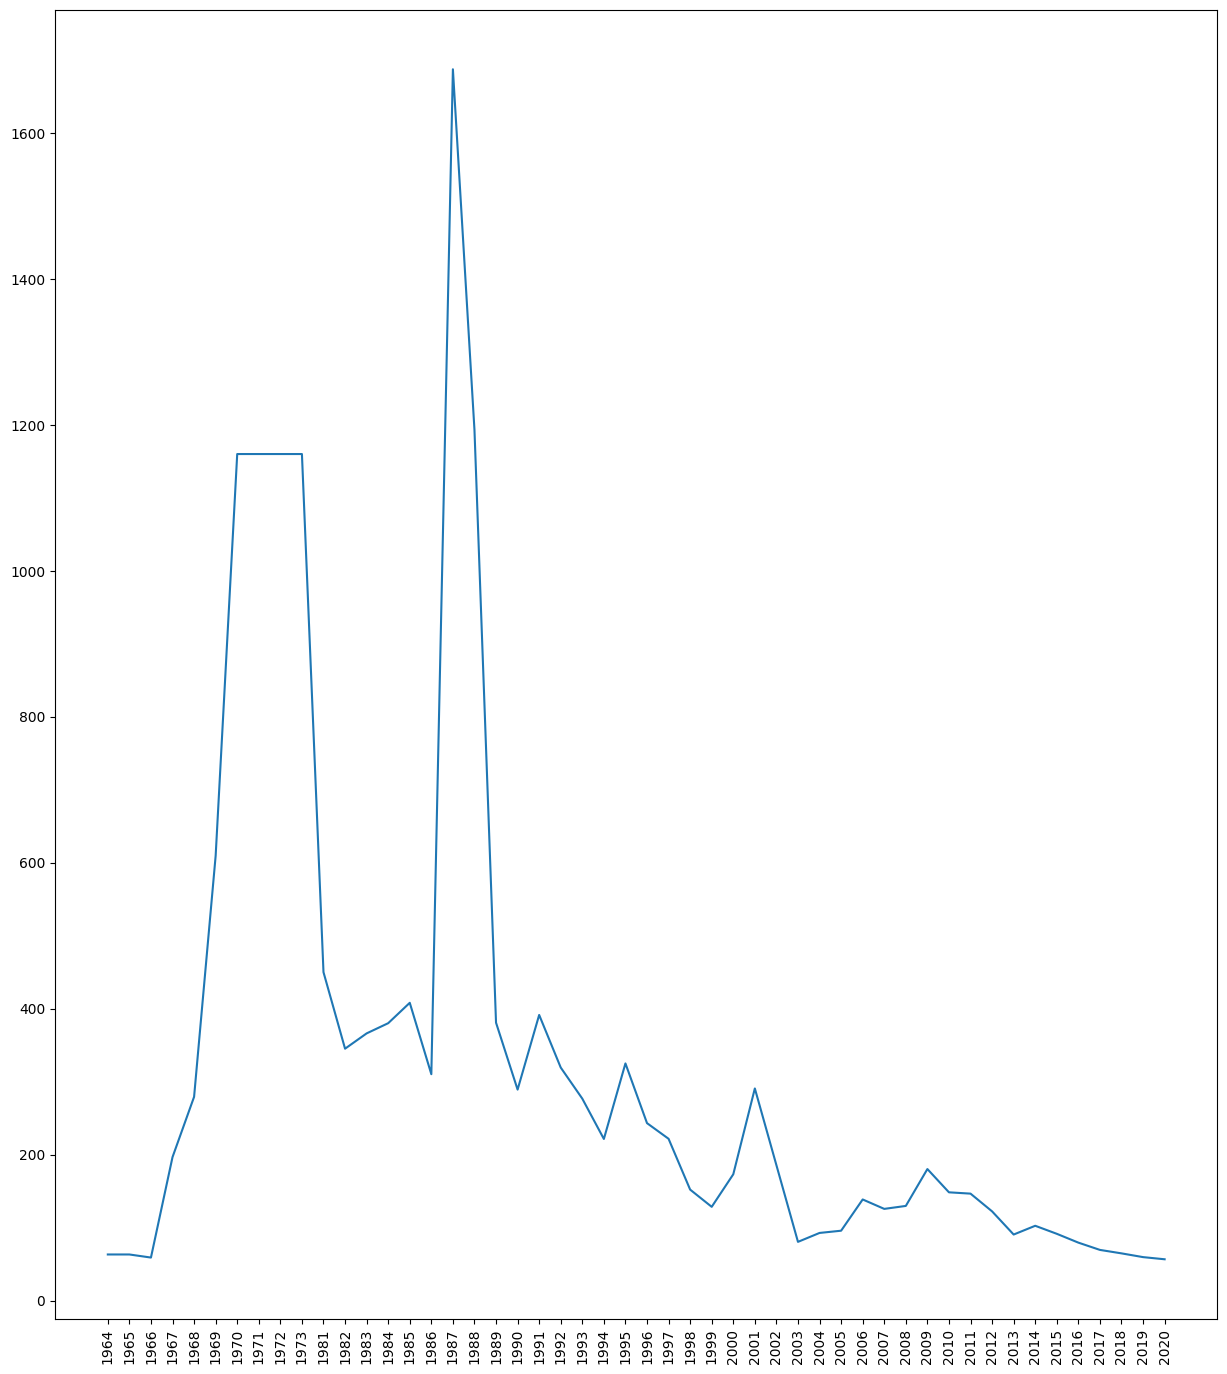

In [39]:
plt.figure(figsize=(15,17))
plt.xticks(rotation=90)
plt.plot(mean_price)

[link text](https://)# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [40]:

line = px.line(
    test,
    x='year',
    y='size',
    color='Organisation'
)
line.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [95]:
d = {'ISO': ['USA','RUS'], 'total': [df_data['ISO'].value_counts()['USA'],df_data['ISO'].value_counts()['RUS'] + df_data['ISO'].value_counts()['KAZ']]}
df = pd.DataFrame(data=d)
df

,ISO,total
0,USA,490
1,RUS,100


In [96]:
fig = px.pie(labels=df.ISO, title='USA VS RUS', names=df.ISO, values=df.total)
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [127]:
yoylaunchesusarus = df_data.groupby(['year','ISO' ]).size().to_frame('size').reset_index().sort_values('year')
# yoylaunchesusarus.drop(yoylaunchesusarus[yoylaunchesusarus['ISO'] != 'USA' | yoylaunchesusarus['ISO'] != 'RUS' | yoylaunchesusarus['ISO'] != 'KAZ'].index)
a = ['USA', 'RUS', 'KAZ']
yoylaunchesusarus = yoylaunchesusarus.drop(yoylaunchesusarus[(~yoylaunchesusarus['ISO'].isin(a) )].index)
yoylaunchesusarus

,year,ISO,size
0,1964,USA,2
1,1965,USA,2
2,1966,USA,3
3,1967,USA,8
4,1968,USA,10
...,...,...,...
169,2019,RUS,5
167,2019,KAZ,9
176,2020,RUS,1
174,2020,KAZ,6


In [129]:
line = px.line(
    yoylaunchesusarus,
    x='year',
    y='size',
    color='ISO'
)
line.show()

## Chart the Total Number of Mission Failures Year on Year.

In [218]:
df_data.head(1)
b = ['Success']
missionfailures = df_data.drop(df_data[(df_data['Mission_Status'].isin(b))].index)
missionfailures = missionfailures.groupby(['year']).size().to_frame('size').reset_index()


In [196]:
line = px.line(
    missionfailures,
    x='year',
    y='size',
)
line.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [199]:
b = ['Success']
missionfailures = df_data.drop(df_data[(df_data['Mission_Status'].isin(b))].index)
missionfailures = missionfailures.groupby(['year']).size().to_frame('totalfails').reset_index().sort_values(by='year')
# print(missionfailures)

totalmissionsperyear = df_data.groupby(['year']).size().to_frame('totalmissions').reset_index().sort_values(by='year')
# print(totalmissionsperyear)

# result = pd.concat([missionfailures, totalmissionsperyear], ignore_index=True, sort=False)
result = missionfailures.set_index('year').join(totalmissionsperyear.set_index('year'))


result['percent'] = result.totalfails / result.totalmissions
result.columns

Index(['totalfails', 'totalmissions', 'percent'], dtype='object')

In [202]:
line = px.line(
    result,
    x=result.index,
    y='percent',
)
line.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [235]:
groupedyoytop = df_data.groupby(['year',])['ISO'].apply(pd.Series.mode).reset_index()
groupedyoytop

,year,level_1,ISO
0,1964,0,USA
1,1965,0,USA
2,1966,0,USA
3,1967,0,USA
4,1968,0,USA
5,1969,0,USA
6,1970,0,USA
7,1971,0,USA
8,1972,0,USA
9,1973,0,USA


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [98]:
test = df_data.groupby(['year','Organisation' ]).size().to_frame('size').reset_index()
line = px.line(
    test,
    x='year',
    y='size',
    color='Organisation'
)
line.show()